In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [2]:
import json

# Load JSON Lines data
data = []
with open('Cell_Phones_and_Accessories.json', 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))  
        

In [3]:
df = pd.DataFrame(data) 

In [5]:
df.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a1321d5741a2384e802c552'},A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200,"01 13, 2013",Cell_Phones_and_Accessories,1.0
1,{'$oid': '5a1321d5741a2384e802c557'},A1BJGDS0L1IO6I,0110400550,"cf ""t""","[0, 3]",ITEM NOT SENT from Blue Top Company in Hong Ko...,1.0,ITEM NOT SENT!!,1359504000,"01 30, 2013",Cell_Phones_and_Accessories,0.0
2,{'$oid': '5a1321d5741a2384e802c550'},A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400,"11 22, 2012",Cell_Phones_and_Accessories,1.0
3,{'$oid': '5a1321d5741a2384e802c553'},A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600,"07 18, 2013",Cell_Phones_and_Accessories,1.0
4,{'$oid': '5a1321d5741a2384e802c559'},A30P2CYOUYAJM8,0110400550,Gene,"[1, 1]",I got this for my 14 year old sister. She lov...,4.0,Cool purchase.,1363737600,"03 20, 2013",Cell_Phones_and_Accessories,1.0


In [6]:
# Drop unwanted columns
unwanted_columns = ['_id','reviewerID', 'asin', 'reviewerName','helpful', 'unixReviewTime', 'reviewTime', 'category']
df = df.drop(columns=unwanted_columns)

In [7]:
df= df.rename(columns={"reviewText":"Review","overall": "Rating"})

In [8]:
df.shape

(3185845, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185845 entries, 0 to 3185844
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Review   object 
 1   Rating   float64
 2   summary  object 
 3   class    float64
dtypes: float64(2), object(2)
memory usage: 97.2+ MB


In [10]:
df.isnull().sum()

Review     0
Rating     0
summary    0
class      0
dtype: int64

In [12]:
df['Rating']= df['Rating'].astype(int)
df['class']= df['class'].astype(int)

In [13]:
df.head()

,Review,Rating,summary,class
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0
2,Saw this same case at a theme park store for 2...,5,Great product,1
3,case fits perfectly and I always gets complime...,5,Perfect,1
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1


In [14]:
# Check how many duplicates exist
duplicates = df.duplicated(subset='Review').sum()
print(f"Number of duplicate reviews: {duplicates}") 

Number of duplicate reviews: 12529


In [15]:
# Remove duplicate reviews
df = df.drop_duplicates(subset='Review', keep='first')

In [16]:
# Check new shape after removing duplicates
print("New shape of the dataset:", df.shape)

New shape of the dataset: (3173316, 4)


In [17]:
df['Review'] = df['Review'].fillna('')

In [18]:
df['review_len'] = df['Review'].apply(lambda x: len(x.split(' ')))

In [19]:
df.head()

,Review,Rating,summary,class,review_len
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32
2,Saw this same case at a theme park store for 2...,5,Great product,1,21
3,case fits perfectly and I always gets complime...,5,Perfect,1,20
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22


In [20]:
def map_sentiment(rating):
    if rating <=2:
        return 0 
    elif rating == 3:
        return 1
    else:
        return 2

In [21]:
df['sentiment'] = df['Rating'].apply(map_sentiment)

In [22]:
print("Sentiment class distribution:")
print(df['sentiment'].value_counts())

Sentiment class distribution:
sentiment
2    2243464
0     634339
1     295513
Name: count, dtype: int64


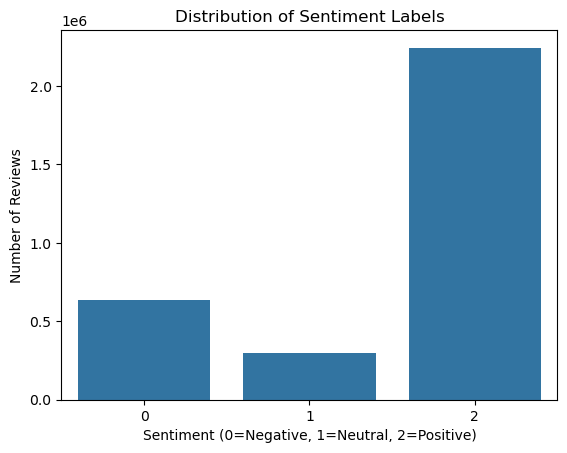

In [23]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0=Negative, 1=Neutral, 2=Positive)')
plt.ylabel('Number of Reviews')
plt.show()

In [24]:
df.head()

,Review,Rating,summary,class,review_len,sentiment
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,2
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,0
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,2
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,2
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,2


In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [26]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [35]:
df['review_clean']=df['Review'].apply(clean_text)

In [36]:
df.head()

,Review,Rating,summary,class,review_len,sentiment,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,2,best phone case ever everywhere i go i get a ...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,0,item not sent from blue top company in hong ko...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,2,saw this same case at a theme park store for ...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,2,case fits perfectly and i always gets complime...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,2,i got this for my year old sister she loves ...


In [37]:
stop_words = set(stopwords.words('english'))    

In [38]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [39]:
df['review_clean']= df['review_clean'].apply(preprocess_text)

In [40]:
df.head()

,Review,Rating,summary,class,review_len,sentiment,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,2,best phone case ever everywhere go get ton com...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,0,item sent blue top company hong kong two month...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,2,saw case theme park store dollars good quality...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,2,case fits perfectly always gets compliments ha...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,2,got year old sister loves really really dont c...


In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
lemmatizer = WordNetLemmatizer()

In [43]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

In [44]:
df['review_clean'] = df['review_clean'].apply(lemmatize_text)

In [45]:
df.head()

,Review,Rating,summary,class,review_len,sentiment,review_clean
0,Best phone case ever . Everywhere I go I get a...,5,A++++,1,23,2,best phone case ever everywhere go get ton com...
1,ITEM NOT SENT from Blue Top Company in Hong Ko...,1,ITEM NOT SENT!!,0,32,0,item sent blue top company hong kong two month...
2,Saw this same case at a theme park store for 2...,5,Great product,1,21,2,saw case theme park store dollar good quality ...
3,case fits perfectly and I always gets complime...,5,Perfect,1,20,2,case fit perfectly always get compliment hasnt...
4,I got this for my 14 year old sister. She lov...,4,Cool purchase.,1,22,2,got year old sister love really really dont co...


In [46]:
df[['review_clean', 'Review']].head()

,review_clean,Review
0,best phone case ever everywhere go get ton com...,Best phone case ever . Everywhere I go I get a...
1,item sent blue top company hong kong two month...,ITEM NOT SENT from Blue Top Company in Hong Ko...
2,saw case theme park store dollar good quality ...,Saw this same case at a theme park store for 2...
3,case fit perfectly always get compliment hasnt...,case fits perfectly and I always gets complime...
4,got year old sister love really really dont co...,I got this for my 14 year old sister. She lov...


In [47]:
# TF-IDF and Logistic Regression Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
# Split data
X = df['review_clean']
y = df['sentiment']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [51]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [52]:
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [53]:
# Evaluate
y_pred = lr.predict(X_test_tfidf)

In [54]:
print("Classification Report: Logistic Regression (TF-IDF):")
print(classification_report(y_test, y_pred))

Classification Report: Logistic Regression (TF-IDF):
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    126868
           1       0.28      0.62      0.39     59103
           2       0.96      0.80      0.88    448693

    accuracy                           0.78    634664
   macro avg       0.67      0.73      0.67    634664
weighted avg       0.86      0.78      0.81    634664



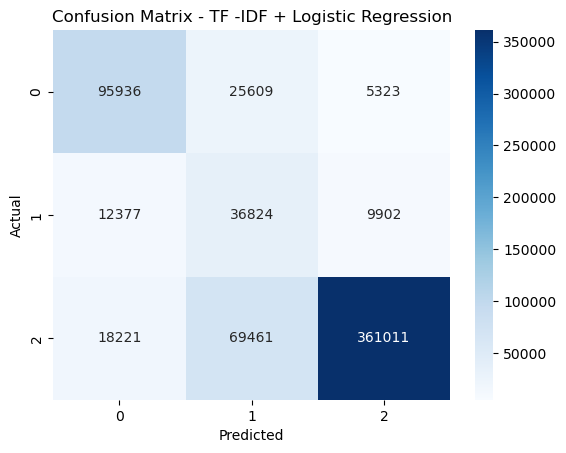

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - TF -IDF + Logistic Regression")
plt.show()

In [56]:
print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.7780037941335888


# SVM

In [57]:
from sklearn.svm import LinearSVC

In [59]:
# Initialize and train the model
svm = LinearSVC(random_state=42, class_weight='balanced')
svm.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced', random_state=42)

In [60]:
y_pred_svm = svm.predict(X_test_tfidf)

In [61]:
print("Classification Report: SVM :")
print(classification_report(y_test, y_pred_svm))

Classification Report: SVM :
              precision    recall  f1-score   support

           0       0.74      0.81      0.77    126868
           1       0.38      0.37      0.38     59103
           2       0.93      0.91      0.92    448693

    accuracy                           0.84    634664
   macro avg       0.68      0.69      0.69    634664
weighted avg       0.84      0.84      0.84    634664



In [62]:
print(" Accuracy:", accuracy_score(y_test, y_pred_svm))

 Accuracy: 0.8365260988491549


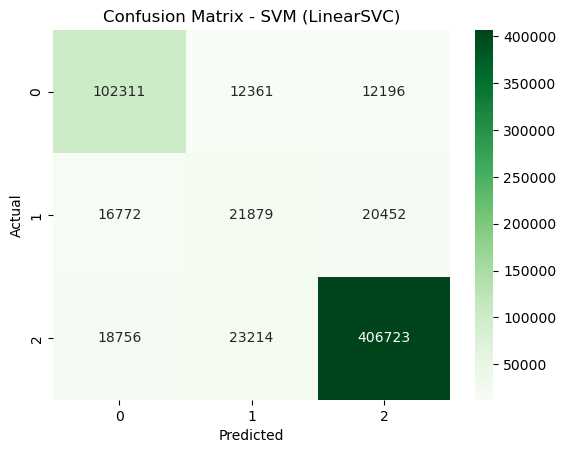

In [63]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Confusion Matrix - SVM (LinearSVC)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression performance metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, average='weighted')
lr_recall = recall_score(y_test, y_pred, average='weighted')
lr_f1 = f1_score(y_test, y_pred, average='weighted')

In [65]:
# SVM performance metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

In [66]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (LinearSVC)'],
    'Accuracy': [lr_accuracy, svm_accuracy],
    'Precision': [lr_precision, svm_precision],
    'Recall': [lr_recall, svm_recall],
    'F1 Score': [lr_f1, svm_f1]
})

In [67]:
print("\nModel Performance Comparison:")
print(comparison)


Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.778004   0.855927  0.778004  0.806053
1      SVM (LinearSVC)  0.836526   0.838281  0.836526  0.837060


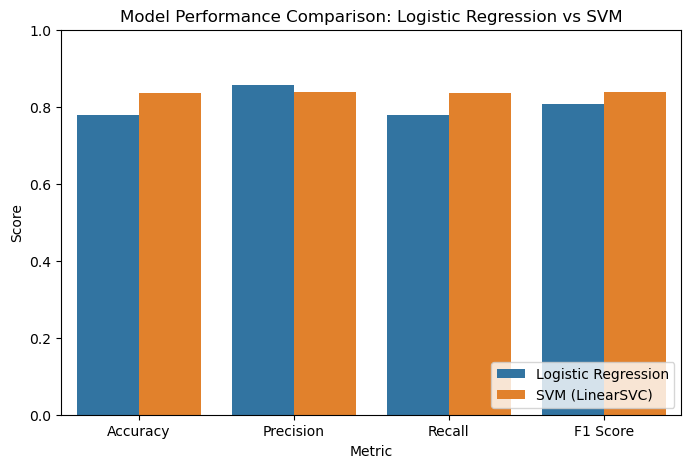

In [68]:

# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(data=comparison.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model')
plt.title("Model Performance Comparison: Logistic Regression vs SVM")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

In [69]:
import joblib

In [70]:
# Save the SVM model
joblib.dump(svm, 'best_model_svm.pkl')

['best_model_svm.pkl']

In [76]:
joblib.dump(tfidf, 'tf_idf_vectorizer.pkl')

['tf_idf_vectorizer.pkl']

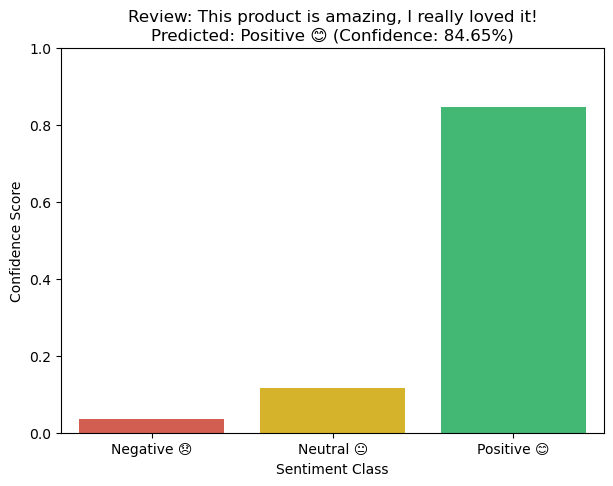


📝 Review: This product is amazing, I really loved it!
🎯 Predicted Sentiment: Positive 😊
🔹 Confidence: 84.65%
🔸 Class probabilities:
   Negative 😞: 3.67%
   Neutral 😐: 11.68%
   Positive 😊: 84.65%
------------------------------------------------------------


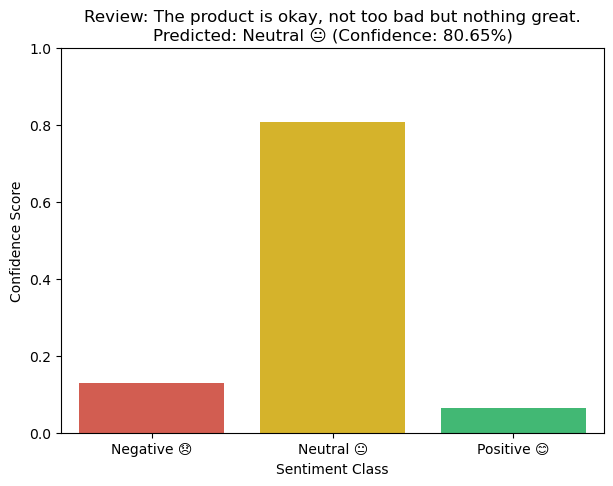


📝 Review: The product is okay, not too bad but nothing great.
🎯 Predicted Sentiment: Neutral 😐
🔹 Confidence: 80.65%
🔸 Class probabilities:
   Negative 😞: 12.80%
   Neutral 😐: 80.65%
   Positive 😊: 6.55%
------------------------------------------------------------


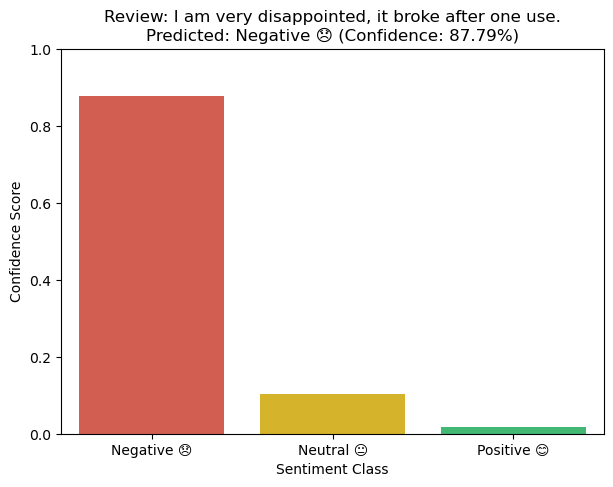


📝 Review: I am very disappointed, it broke after one use.
🎯 Predicted Sentiment: Negative 😞
🔹 Confidence: 87.79%
🔸 Class probabilities:
   Negative 😞: 87.79%
   Neutral 😐: 10.36%
   Positive 😊: 1.85%
------------------------------------------------------------


In [77]:

# Load model and vectorizer

loaded_model = joblib.load('best_model_svm.pkl')
loaded_tfidf = joblib.load('tf_idf_vectorizer.pkl')


# Define test reviews

test_reviews = [
    "This product is amazing, I really loved it!",       # Positive
    "The product is okay, not too bad but nothing great.", # Neutral
    "I am very disappointed, it broke after one use."     # Negative
]

# Sentiment labels
sentiment_labels = {0: 'Negative 😞', 1: 'Neutral 😐', 2: 'Positive 😊'}


# Predict and visualize each

for review in test_reviews:
    sample_tfidf = loaded_tfidf.transform([review])
    predicted_sentiment = loaded_model.predict(sample_tfidf)
    decision_scores = loaded_model.decision_function(sample_tfidf)
    
    # Softmax for normalized probabilities
    probabilities = np.exp(decision_scores) / np.sum(np.exp(decision_scores), axis=1, keepdims=True)
    
    # Predicted label and confidence
    pred_label = sentiment_labels[predicted_sentiment[0]]
    confidence = probabilities[0][predicted_sentiment[0]] * 100

    # Plot probability bar chart
    plt.figure(figsize=(7, 5))
    sns.barplot(
        x=list(sentiment_labels.values()), 
        y=probabilities[0], 
        palette=['#e74c3c', '#f1c40f', '#2ecc71']
    )
    plt.title(f"Review: {review}\nPredicted: {pred_label} (Confidence: {confidence:.2f}%)", fontsize=12)
    plt.ylabel('Confidence Score')
    plt.xlabel('Sentiment Class')
    plt.ylim(0, 1)
    plt.show()

    # Print text summary
    print(f"\n📝 Review: {review}")
    print(f"🎯 Predicted Sentiment: {pred_label}")
    print(f"🔹 Confidence: {confidence:.2f}%")
    print("🔸 Class probabilities:")
    for i, label in sentiment_labels.items():
        print(f"   {label}: {probabilities[0][i]*100:.2f}%")
    print("-" * 60)
